https://www.kaggle.com/code/marcelotc/creditcard-fraud-logistic-regression-example

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [21]:
df = pd.read_csv("data/Credit_Card_Applications.csv")

In [23]:
print('Total de linhas e colunas\n\n',df.shape,'\n')

Total de linhas e colunas

 (690, 16) 



In [25]:
df.isnull().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [29]:
df.describe().round()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,690.0,690.0,690.0,690.0,690.0,690.0,690.0,690.0,690.0,690.0,690.0,690.0,690.0,690.0,690.0,690.0
mean,15690471.0,1.0,32.0,5.0,2.0,7.0,5.0,2.0,1.0,0.0,2.0,0.0,2.0,184.0,1018.0,0.0
std,71506.0,0.0,12.0,5.0,0.0,4.0,2.0,3.0,0.0,0.0,5.0,0.0,0.0,172.0,5210.0,0.0
min,15565714.0,0.0,14.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
25%,15631687.0,0.0,23.0,1.0,2.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,80.0,1.0,0.0
50%,15690161.0,1.0,29.0,3.0,2.0,8.0,4.0,1.0,1.0,0.0,0.0,0.0,2.0,160.0,6.0,0.0
75%,15751896.0,1.0,38.0,7.0,2.0,10.0,5.0,3.0,1.0,1.0,3.0,1.0,2.0,272.0,396.0,1.0
max,15815443.0,1.0,80.0,28.0,3.0,14.0,9.0,28.0,1.0,1.0,67.0,1.0,3.0,2000.0,100001.0,1.0


Non Fraud %  55.51
Fraud %     44.49


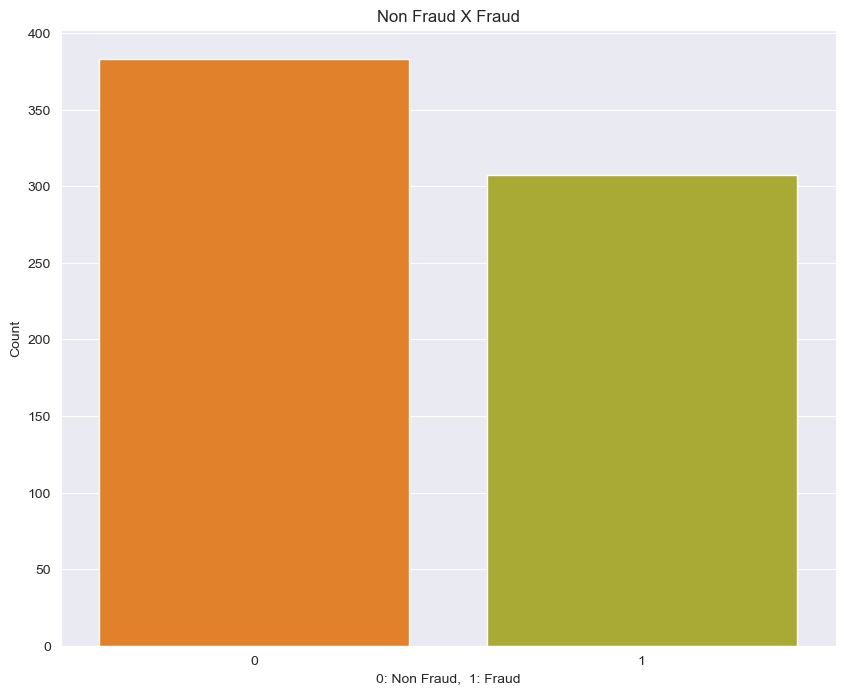

In [31]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(), palette=["C1", "C8"])
plt.title('Non Fraud X Fraud')
plt.ylabel('Count')
plt.xlabel('0: Non Fraud,  1: Fraud')
print ('Non Fraud % ',round(df['Class'].value_counts()[0]/len(df)*100,2))
print ('Fraud %    ',round(df['Class'].value_counts()[1]/len(df)*100,2));

In [53]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30:].columns

data_features = df[feature_names]
data_target = df['Class']

In [55]:
feature_names

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'Class'],
      dtype='object')

In [57]:
target

Index([], dtype='object')

In [59]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, 
                                                    train_size=0.70, test_size=0.30, 
                                                    random_state=1)

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

### You can complete this part for practice

Follow the steps from this link: https://www.kaggle.com/code/marcelotc/creditcard-fraud-logistic-regression-example

# Model Training

In [96]:
# Fitting the model
lr.fit(X_train, y_train)

LogisticRegression()

# Model Evaluation

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Making predictions
y_pred = lr.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9323671497584541
Confusion Matrix:
 [[109   6]
 [  8  84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       115
           1       0.93      0.91      0.92        92

    accuracy                           0.93       207
   macro avg       0.93      0.93      0.93       207
weighted avg       0.93      0.93      0.93       207



# Visualizing Results

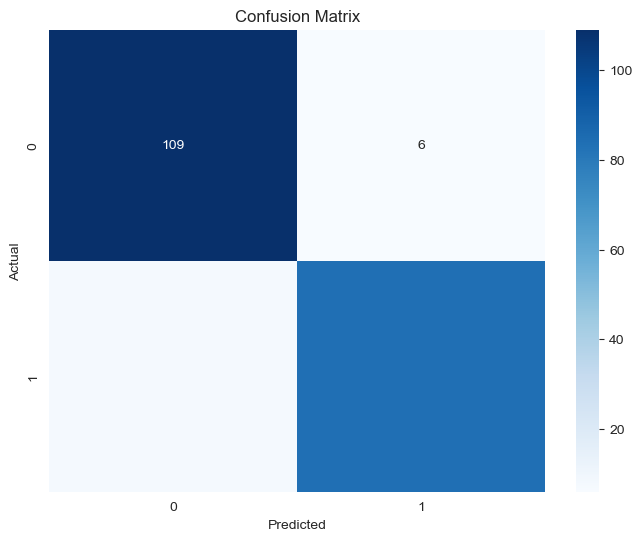

In [102]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [104]:
def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

# Model Evaluation Summary

Accuracy
    
    Accuracy: 93.24%
        This indicates that the model correctly classified approximately 93% of the transactions overall.

Confusion Matrix
    Confusion Matrix:

        [[109   6]   # Non-Fraud (0) Predictions
         [  8  84]]  # Fraud (1) Predictions
                True Negatives (TN): 109 (correctly predicted non-fraud cases)
                False Positives (FP): 6 (incorrectly predicted as fraud)
                False Negatives (FN): 8 (missed fraud cases)
                True Positives (TP): 84 (correctly predicted fraud cases)

Precision and Recall
    Precision (Fraud): 93%

        When the model predicts a transaction as fraud, it is correct 93% of the time.
        Recall (Fraud): 91%

The model identifies 91% of actual fraud cases, indicating that a small portion of fraud cases are missed.